# MNIST

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import os
import seaborn as sns
import glob
import natsort

In [38]:
def get_concat(foldername, seeds):
    for i, seed in enumerate(seeds):
        if i == 0: data = pd.read_csv(os.path.join(save_path,foldername,"s{}.csv".format(seed)))
        else: 
            try: 
                data = pd.concat([data, pd.read_csv(os.path.join(save_path,foldername,"s{}.csv".format(seed)))])
            except:
                pass
    # print(foldername, len(data))
    return data

def get_concat_glob(paths):
    for i, path in enumerate(paths):
        data = pd.read_csv(path)
        data["Mode"] = data["mode"] + data["gn"].astype(str)
        if "LR" in path:
            data["LR"] = float(path.split("LR")[1][:3])
        else:
            data["LR"] = 0.1
        if "G11" in path:
            data["Mode"] = "G11"
            if "Lin" in path:
                data["Decay"] = "GN_Lin"
            else:
                data["Decay"] = "GN_No"
        else:
            data["Decay"] = "No"
        if "G01" in path: continue
        if "G10" in path: 
            data["Mode"] = "G10"
        if "G13" in path:
            data["Mode"] = "G13"
        if "G14" in path:
            data["Mode"] = "G14"
        if "G15" in path:
            data["Mode"] = "G15"
        if i == 0: 
            data_ = data
        else: 
            data_ = pd.concat([data_, data])
    return data_

# Digits

In [39]:
import seaborn as sns
import copy

def load_data():
    datas = list()
    save_path = "../Output/CIFAR100-*/s[1-9].csv"
    path_list = glob.glob(save_path)
    data_temp = get_concat_glob(path_list)
    data_temp["a1"] = data_temp["a1"] * 100
    data_temp["a3"] = data_temp["a3"] * 100
    data_temp['Distribution'] = data_temp['distribution'] .map({0: "Balanced IID partition", 
                                                0.3: "Balanced Dirichlet partition (α=0.3)", 
                                                })
    data_temp['Mode'] = data_temp['Mode'] .map({'fedavg0': "FedAvg", 
                                                'fedprox0': "FedProx", 
                                                'scaffold0': "Scaffold",  
                                                'feddyn0': "FedDyn", 
                                                'G11': "FedGN",
                                                'G01': "FedGN01",
                                                'G10': "FedGN+No",
                                                # 'G11': "FedGN+mean",
                                                'G13': "FedGN+Last",
                                                'G14': "FedGN+First",
                                                'G15': "FedGN+Conv",
                                               })
    print(data_temp["Mode"].unique())
    # sk = ['FedAvg', 'FedProx', 'Scaffold', 'FedDyn', "FedGN", "FedGN+mean"]
    # sk = ['FedAvg', 'FedProx', 'Scaffold', 'FedDyn', "FedGN"]
    sk = ['FedAvg', 'FedProx', 'Scaffold', 'FedDyn', "FedGN", "FedGN+Last", "FedGN+First", "FedGN+No", "FedGN+Conv"]
    data_temp = data_temp.set_index('Mode').loc[sk].reset_index()
    print(data_temp.size)
    return data_temp

['FedAvg' 'FedDyn' 'Scaffold' 'FedGN' 'FedProx' 'FedGN+No' 'FedGN+Last'
 'FedGN+Conv' 'FedGN+First']
231000
(1300, 22)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


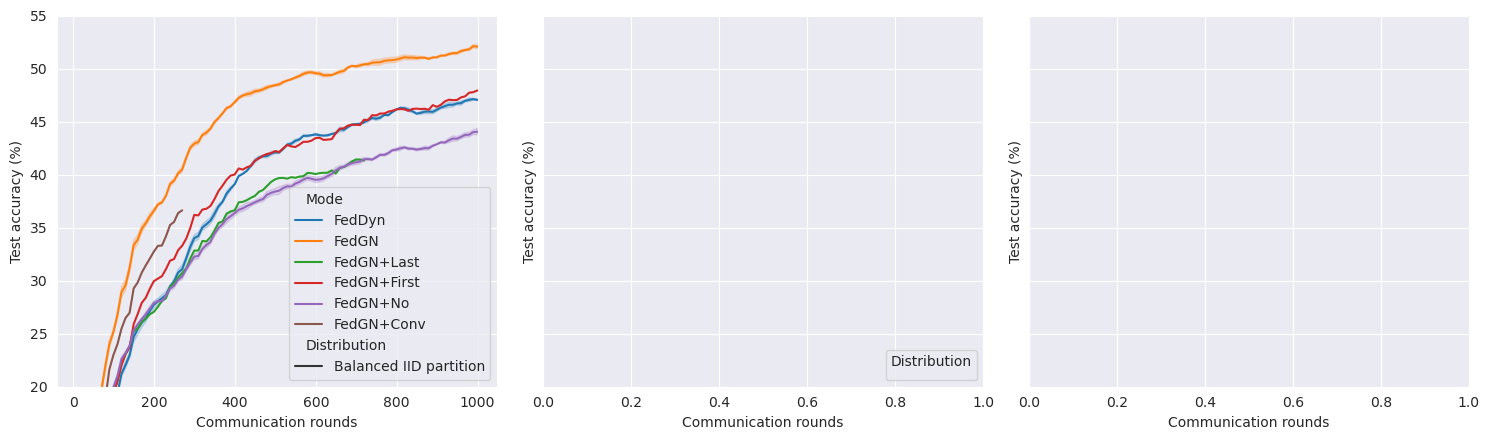

In [50]:
data_temp = load_data()

fig, axes = plt.subplots(1, 3, figsize=(15,4.5), dpi=100, sharey=True)
sns.set_style("darkgrid")
ax = axes[0]
temp = copy.deepcopy(data_temp)
temp = temp[temp["act_prob"] == 0.01]
# temp = temp[(temp["Mode"]=="FedGN") | (temp["Mode"]=="FedGN+Last") |  (temp["Mode"]=="FedGN+First") |  (temp["Mode"]=="FedGN+No") | (temp["Mode"]=="FedAvg") | (temp["Mode"]=="FedDyn")]
temp = temp[(temp["Mode"]=="FedGN") | (temp["Mode"]=="FedGN+Last") |  (temp["Mode"]=="FedGN+First") |  (temp["Mode"]=="FedGN+No") |  (temp["Mode"]=="FedGN+Conv") | (temp["Mode"]=="FedDyn")]
temp = temp[(temp["LR"] == 0.1) | (temp["LR"] == 1.2)]
temp = temp[(temp["Distribution"] == "Balanced IID partition")]
temp = temp[(temp["Decay"] == "No") | (temp["Decay"] == "GN_No")]
print(temp.shape)
ax = sns.lineplot(data=temp, x="epoch", y="a3", ax=ax, hue="Mode", style="Distribution", errorbar="se")
ax.set_ylim([20,55])

for ax in axes.flatten():
    ax.set_xlabel("Communication rounds")
    ax.set_ylabel("Test accuracy (%)"), 

axes[1].legend(title="Distribution", loc=4, prop={'size': 9}), 
fig.tight_layout()